# Исследование данных о продаже игр

**Цель исследования**

В нашем распоряжении данные из открытых источников о продажах видеоигр до 2016-го года. Необходимо выявить определяющие успешность игры закономерности для планирования рекламных кампаний на 2017-ый год в интернет-магазине "Стримчик".

**Ход исследования**

Данные о недвежимости получим из файла `'/datasets/games.csv'`. О качестве данных ничего неизвестно. По этой причине перед тем, как приступать к целям исследования, понадобится обзор данных.

Проверим данные на ошибки/пропуски и оценим их влияние на исследование. На этапе предобработки данных поищем возможность исправить все ошибки в данных, которые не приведут к искажению конечного результата. Далее обогатим данные при необходимости и приступим к исследовательскому анализу данных.

Таким образом исследование будет проведено в несколько этапов:
* Обзор данных
* Предобработка данных
* Обогащение данных
* Проведение анализа успешности продаж в зависимости от различных факторов:
 + Года продаж
 + Игровых платформ
 + Отзывов критиков
 + Жанрам видеоигр
* Проверка гипотез о равенстве средних пользовательских рейтингов топовых платформ и жанров
* Написание общего вывода


## Файл с данными и общая информация

In [ ]:
import pandas as pd
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/datasets/games.csv')
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Будет необходимо провести измение типов данных, оценки критиков похоже целочисленны (диапазон 1-100), тогда как оценки пользователей могут принимать дробные значения (диапазон 1-10).

## Подготовка данных

### Изменение названий столбцов

In [ ]:
# Посмотрим названия столбцов
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведём все названия к змеиному регистру + единому формату, а также скорректируем имена.

In [ ]:
df = df.rename(
 columns={
'Name': 'game',
'Platform': 'platform',
'Year_of_Release': 'release_year',
'Genre': 'genre',
'NA_sales': 'na_sales',
'EU_sales': 'eu_sales',
'JP_sales': 'jp_sales',
'Other_sales': 'other_sales',
'Critic_Score': 'critic_score',
'User_Score': 'user_score',
'Rating': 'age_rating'
 }
)

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо! Приводим названия колонок к общепринятому стилю. 😉 <br>
А можно просто методом вот так:</font><br>
`df.columns = df.columns.str.lower()`

In [ ]:
df.columns

Index(['game', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'age_rating'],
      dtype='object')

In [ ]:
# Оценим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   release_year  16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  age_rating    9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропуски присутствуют в столбцах с рейтингами.

### Обработка пропусков и изменение типа данных

In [ ]:
# Посмотрим на значения столбца 'user_score'
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Присутствует значение 'tbd', возможные причины:
* технический аспект при сохранении/передаче/извлечении данных;
* малое количестве оценок для конкретных игр, что влечёт за собой отсутствие калькуляции;
* давний релиз игры, когда централизованная система оценок отсутствовала.

In [ ]:
df.query('user_score == "tbd"')['user_score'].count()

2424

Мощность значения 'tbd' в `'user_score'` около 15% датасета. Заменим значения пропусками.  

In [ ]:
# Изменим тип данных столбцов 'release_year', 'critic_score' на целочисленный.
# Столбец 'user_score' приведём к числовому формату, значения 'tbd' заменим на пустые значения.
df['release_year'] = df['release_year'].astype('Int64', errors='ignore')
df['critic_score'] = df['critic_score'].astype('Int64', errors='ignore')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [ ]:
# Проверим успешность изменения типа данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   release_year  16446 non-null  Int64  
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   Int64  
 9   user_score    7590 non-null   float64
 10  age_rating    9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


In [ ]:
# Оценим количество пропусков
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
game,0.000000
platform,0.000000
release_year,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


Пропуски присутствуют в ряде столбцов:
* release_year
* critic_score
* user_score
* age_rating

In [ ]:
# Поставим заглушки на отсутствующие значения в рейтингах.
df['user_score'] = df['user_score'].fillna(-1)
df['critic_score'] = df['critic_score'].fillna(-1)
df['age_rating'] = df['age_rating'].fillna('unknown')

In [ ]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
game,0.000000
platform,0.000000
release_year,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


In [ ]:
#df['age_raing'] = df['age_rating'].fillna('unknown', inplace=True)

### Добавление данных

In [ ]:
# Добавим новый столбец с общим количеством продаж
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Мы молодцы, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
`= data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)`

### Обработка дубликатов

In [ ]:
# Проверим на полные дубликаты
df.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены дубликаты, иногда они сильно искажают анализ.</font>

In [ ]:
# Проверим на неявные дубликаты
df_names = df.loc[:,['game', 'platform', 'release_year']]
df_names = df_names.value_counts().sort_values(ascending=False)
display(df_names)

game                                                        platform  release_year
Madden NFL 13                                               PS3       2012            2
4 Play Collection - Dark Mysteries                          PC        2014            1
100 Classic Books                                           DS        2008            1
2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe  XB        2004            1
.hack//Quarantine Part 4: The Final Chapter                 PS2       2003            1
                                                                                     ..
thinkSMART                                                  DS        2010            1
thinkSMART FAMILY!                                          Wii       2010            1
thinkSMART: Chess for Kids                                  DS        2011            1
uDraw Studio                                                Wii       2010            1
¡Shin Chan Flipa en colores!         

In [ ]:
df[(df['game']=='Madden NFL 13') & (df['platform']=='PS3')]

,game,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E,0.01


In [ ]:
# Посмотрим какие пропуски остались
temp = df.copy()
list_c = ['game', 'platform', 'release_year', 'genre', 'critic_score', 'user_score', 'age_rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   release_year  16446 non-null  Int64  
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  16715 non-null  Int64  
 9   user_score    16715 non-null  float64
 10  age_rating    16715 non-null  object 
 11  total_sales   16715 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.6+ MB
None
-------------------------
game [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
game : кол-во NaN 2 , процент NaN 0.01 %
----------------

In [ ]:
df = df.dropna(subset=['game', 'genre'])

### Вывод
Были скорректированы названия столбцов, изменён тип данных в нескольких столбцах и поставлены заглушки на пропущенные значения столбцов рейтингов, удалены порядка 1.6% данных, имеющих пропуски в столбцах 'name' и 'genre'.

Возможные причины возникновения пропусков:
* технический аспект при сохранении/передаче/извлечении данных;
* малое количестве оценок для конкретных игр, что влечёт за собой отсутствие калькуляции;
* давний релиз игры, когда централизованная система оценок отсутствовала;
* пропуски в возрастных рейтингах вероятно имеют взаимосвязь с географией издателей.

## Исследовательский анализ данных

### Распределение количества релизов и объёма продаж в разрезе по году выпуска

In [ ]:
#Посмотрим на количество выпускаемых игр по годам.
#plt.xlabel('Год выпуска игры')
#plt.ylabel('Количество релизов')
#plt.title('Распределение количества релизов игр по годам')
#df['release_year'].hist(bins=30, figsize=(12,8), color='teal');

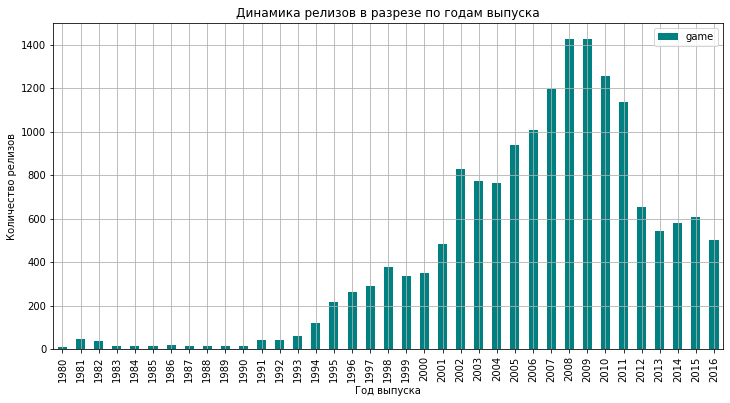

In [ ]:
#Посмотрим на количество выпускаемых игр по годам.
(df
 .pivot_table(index='release_year', values='game', aggfunc='count')
 .sort_values('release_year')
 .plot(kind='bar', y='game', figsize=(12,6), color='teal', grid=True, xlabel='Год выпуска', ylabel='Количество релизов', title='Динамика релизов в разрезе по годам выпуска')
);

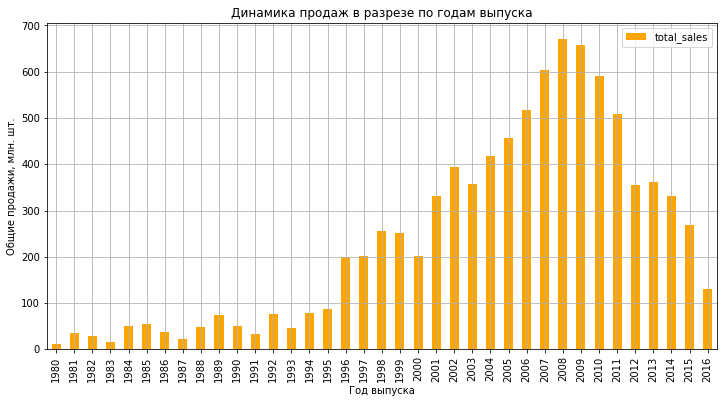

In [ ]:
#Посмотрим на общий объём продаж по годам.
(df
 .pivot_table(index='release_year', values='total_sales', aggfunc='sum')
 .sort_values('release_year')
 .plot(kind='bar', y='total_sales', figsize=(12,6), color='orange', grid=True, xlabel='Год выпуска', ylabel='Общие продажи, млн. шт.', title='Динамика продаж в разрезе по годам выпуска')
);

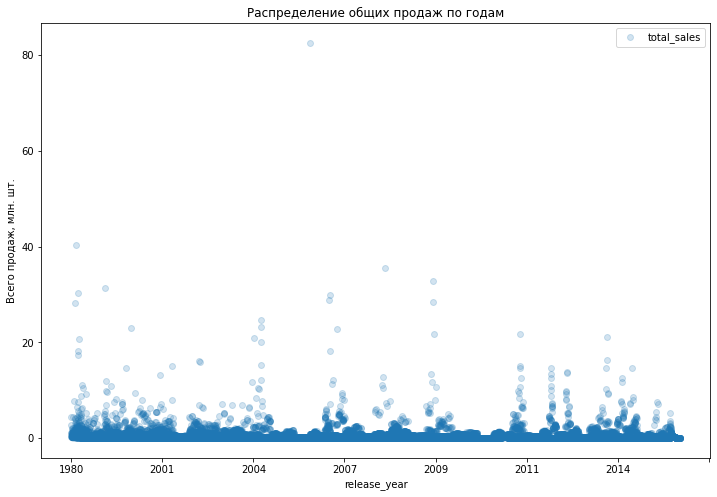

In [ ]:
# Построим диаграмму рассеяния зависимости глобальных продаж от года выпуска
df.sort_values('release_year').plot(x='release_year', y='total_sales', ylabel='Всего продаж, млн. шт.', figsize=(12, 8), style='o', legend=True, alpha=0.2, title='Распределение общих продаж по годам');

In [ ]:
# Посмотрим на описание данных столбца 'total_sales'
print(df['total_sales'].describe())
print(f'Total sales median = {df["total_sales"].median()}')

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64
Total sales median = 0.16999999999999998


C 2009-го года наблюдается падение количества выпускаемых игр, графики общего объёма продаж и количества релизов в разрезе по годам похожи. Медиана `total_sales` равняется 0.11 млн., тогда как среднее значение равняется 0.49 млн. шт., что говорит о наличии крайне успешных проектов (подтверждается диаграммой рассеяния).  
В будущем мы определим актуальный период для анализа данных, для решения поставленной задачи в динамичной среде gamedev'a нам потребуется отрезок данных в несколько лет.

### Динамика продаж по платформам

In [ ]:
# Посмотритим, как менялись продажи по платформам.
# Для этого сформируем сводную таблицу с уровнем продаж по плтаформам
df_platforms_by_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
df_platforms_by_sales['total_sales_share'] = df_platforms_by_sales['total_sales'] / df_platforms_by_sales['total_sales'].sum() * 100
display(df_platforms_by_sales)

,total_sales,total_sales_share
platform,,
PS2,1255.77,14.088737
X360,971.42,10.898557
PS3,939.65,10.542123
Wii,907.51,10.181538
DS,806.12,9.044023
PS,730.86,8.199666
GBA,317.85,3.566023
PS4,314.14,3.524400
PSP,294.05,3.299006


In [ ]:
matplotlib.rcParams.update({'font.size': 14}) # размер шрифта на графиках

In [ ]:
data = df.groupby('platform')['total_sales'].agg(sum='sum').sort_values('sum', ascending=False).reset_index()

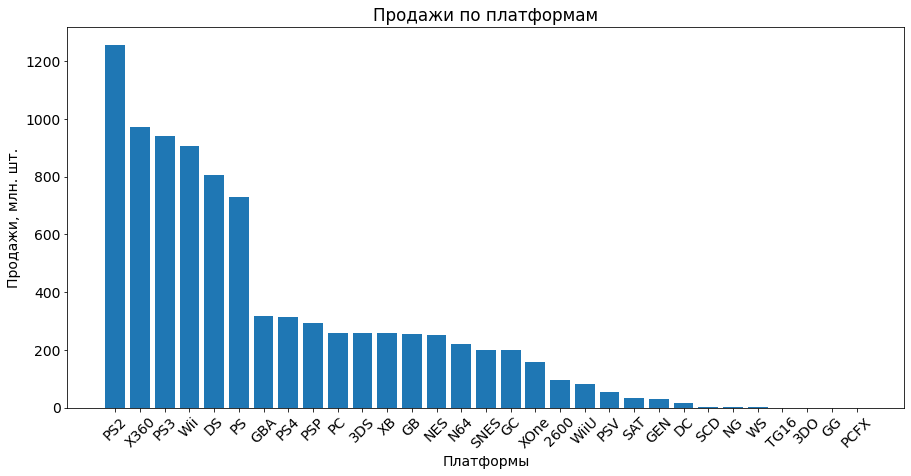

In [ ]:
plt.figure(figsize=(15, 7))

plt.bar(data['platform'], data['sum'])

plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн. шт.')
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Ограничим выбор первыми 10-ью платформами (~75%)
df_platforms_by_sales = df_platforms_by_sales[:10]
df_top_platforms = df.query('platform in @df_platforms_by_sales.index')

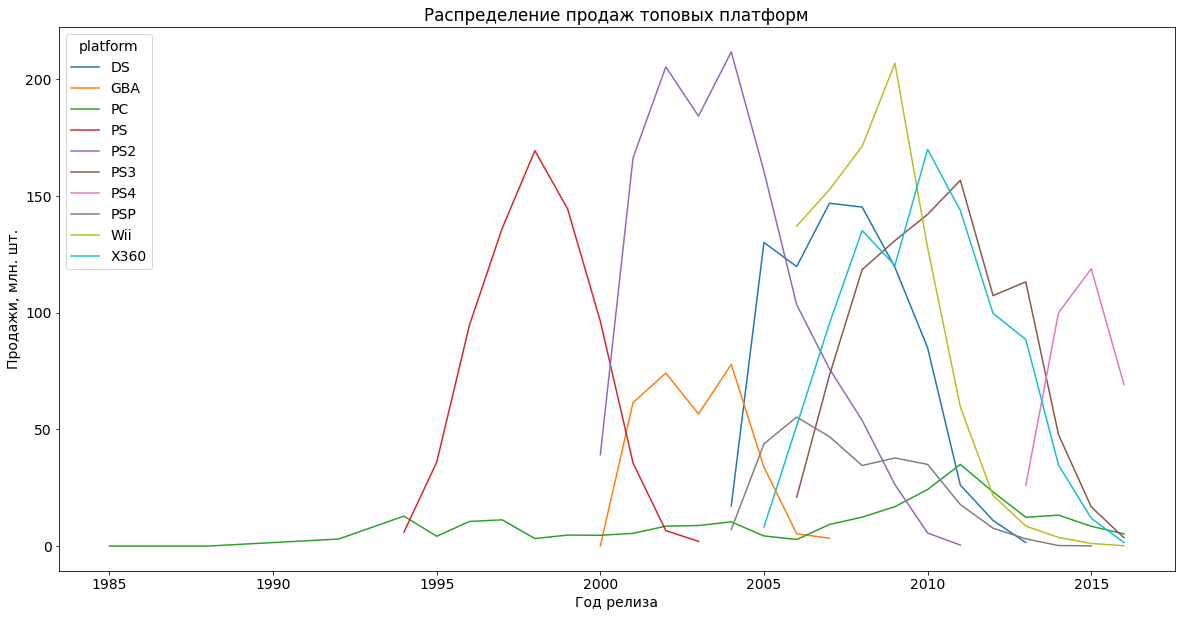

In [ ]:
# Построим график продаж топовых платформ по годам
(df_top_platforms
.pivot_table(index='release_year', columns='platform', values='total_sales', aggfunc='sum')
.plot(figsize=(20,10), legend=True, xlabel='Год релиза', ylabel='Продажи, млн. шт.', title='Распределение продаж топовых платформ')
);

Средний срок жизни платформы порядка 8 лет.  

Учитывая допущение "основные продажи игры приходятся на год релиза" в комбинации со стремительным развитием видеоигр, в свете поставленной задачи по развитию продаж в интернет-магазине "Стримчик", мы ограничимся периодом после 2013-го года включительно.

In [ ]:
df = df[df['release_year']>=2013]

In [ ]:
# Повторим шаги для выбранного актуального периода
df_platforms_by_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
df_platforms_by_sales['total_sales_share'] = df_platforms_by_sales['total_sales'] / df_platforms_by_sales['total_sales'].sum() * 100
display(df_platforms_by_sales)

,total_sales,total_sales_share
platform,,
PS4,314.14,28.801951
PS3,181.43,16.634424
XOne,159.32,14.607267
3DS,143.25,13.133888
X360,136.80,12.542519
WiiU,64.63,5.925607
PC,39.43,3.615143
PSV,32.99,3.024691
Wii,13.66,1.252418


In [ ]:
# Ограничим выбор первыми 7-ью платформами (~95%)
df_platforms_by_sales = df_platforms_by_sales[:7]
df_top_platforms = df.query('platform in @df_platforms_by_sales.index')

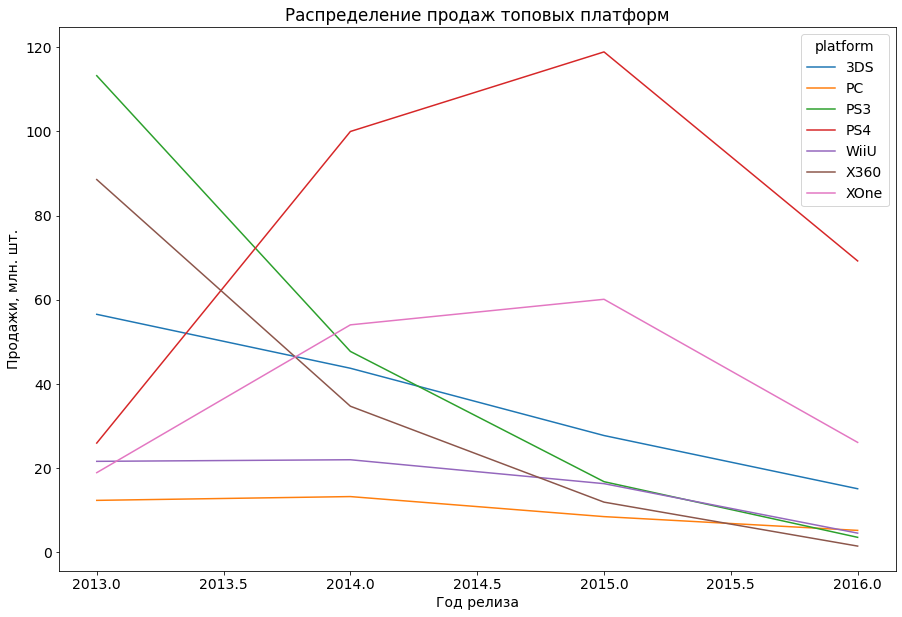

In [ ]:
# Построим график продаж топовых платформ по годам
(df_top_platforms
.pivot_table(index='release_year', columns='platform', values='total_sales', aggfunc='sum')
.plot(figsize=(15,10), legend=True, xlabel='Год релиза', ylabel='Продажи, млн. шт.', title='Распределение продаж топовых платформ')
);

Наблюдается нисходящий тренд в глобальных продажах с 2008-го года.
В целом каждое последующее поколение имеют пиковые значения продаж ниже предыдущих.  
Количество платформ увеличивается ближе к настоящему моменту.  
Справедливо отметить, что датасет похоже не содержит данных по мобильному геймингу, развитие которого может объяснять общее падение продаж ближе к середние 2010-ых годов в сравнении с предшествующим периодом 2005-2010 гг.

Приоритетнее будет фокусироваться на платформах текущего поколения (которые в свою очередь лидируют по общему количеству продаж) + PC, тк эта платформа стабильно занимает свою нишу за весь за всю историю наблюдений:
* PS4
* XOne
* PC
* Возможно 3DS

### Boxplot глобальных продаж по платформам

In [ ]:
# Для построения графика с усами возьмём топ-7 платформ
df_boxplot = df.pivot_table(index='game', columns='platform', values='total_sales')

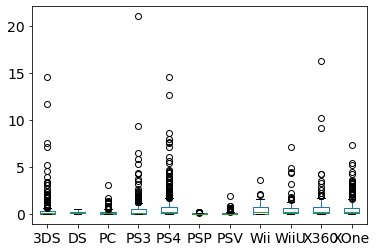

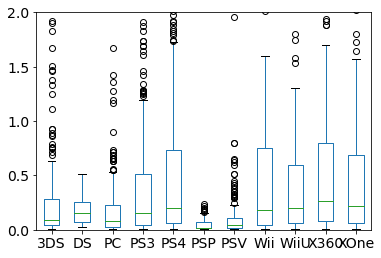

In [ ]:
df_boxplot.plot(kind='box');
df_boxplot.plot(kind='box', ylim=(0, 2));

In [ ]:
#Не очень читабильный вариант, сделаем новый график с уникальными шкалами для каждой платформы.

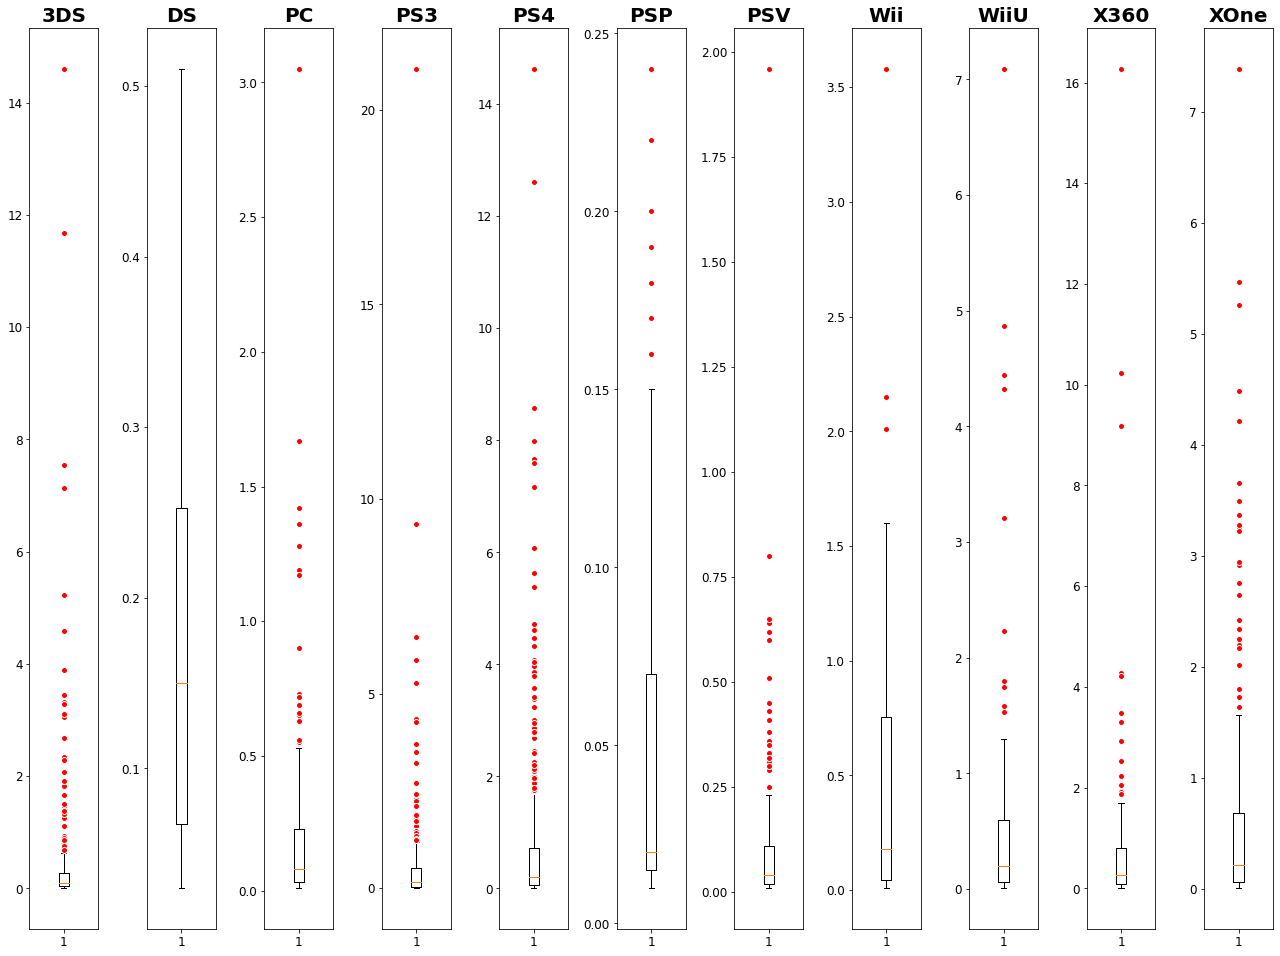

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fix, axs = plt.subplots(1, len(df_boxplot.columns), figsize=(18,13.5))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_boxplot.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_boxplot.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(labelsize=12)

plt.tight_layout()

Зачастую игры продаются тиражами до 1 - 1.5 млн. копий, тем не менее есть большое количество примеров крайне успешных проектов, продающихся единицами млн. копий и даже десятками млн. копий. Платформы `PS4` и `XOne` выглядят наиболее привлекательно.

### Оценка влияния отзывов на уровень продаж

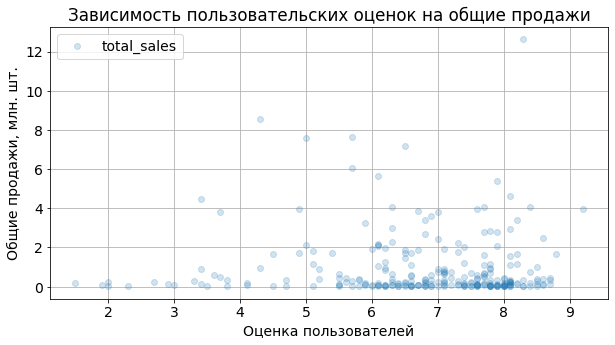

In [ ]:
# Посмотрим на влияние отзывов пользователей и критиков на уровень продаж на базе платформы PS4
(df[(df['platform']=='PS4') & (df['user_score']>0)]
.plot(x='user_score', y='total_sales', figsize=(10,5), style='o', alpha=0.2, grid=True, xlabel='Оценка пользователей', ylabel='Общие продажи, млн. шт.', title='Зависимость пользовательских оценок на общие продажи')
);

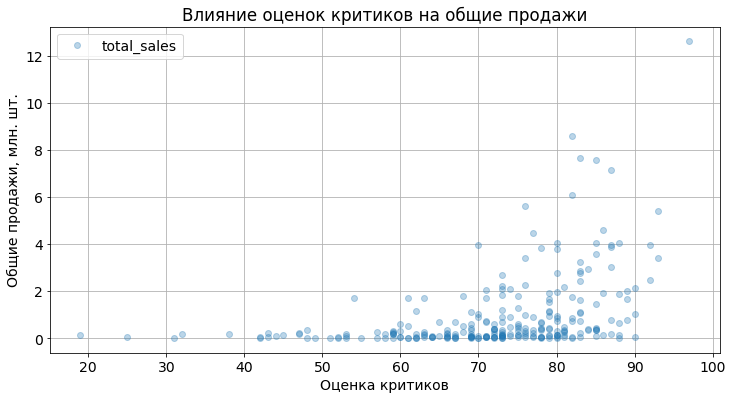

In [ ]:
# По отзывам критиков
(df[(df['platform']=='PS4') & (df['critic_score']>0)]
.plot(x='critic_score', y='total_sales', figsize=(12,6), style='o', alpha=0.3, grid=True, xlabel='Оценка критиков', ylabel='Общие продажи, млн. шт.', title='Влияние оценок критиков на общие продажи')
);

In [ ]:
# Посмотрим на корреляцию Пирсена
df[(df['platform']=='PS4') & (df['user_score']>0) & (df['critic_score']>0)][['total_sales','user_score','critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.033625,0.405895
user_score,-0.033625,1.000000,0.557654
critic_score,0.405895,0.557654,1.000000


Для платформы `PS4` корреляции между оценками игроков и общими продажами не наблюдается.  
Корреляция между оценками критиков и глобальными продажами слабая.  
Присутствуют как проекты с низкими оценками и высокими продажами, так и проекты, оценённые высоко, но продающиеся слабо.  
В целом на продажи больше влияет качество конечного продукта, приправленное эффективным маркетингом издателя, что в свою очередь обеспечивает более высокие оценки критиков.

Корреляция Пирсена для платформы XOne


,total_sales,user_score,critic_score
total_sales,1.000000,-0.094003,0.410422
user_score,-0.094003,1.000000,0.472462
critic_score,0.410422,0.472462,1.000000


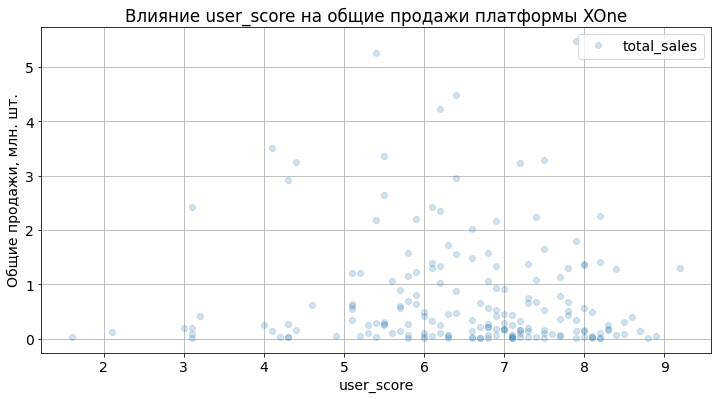

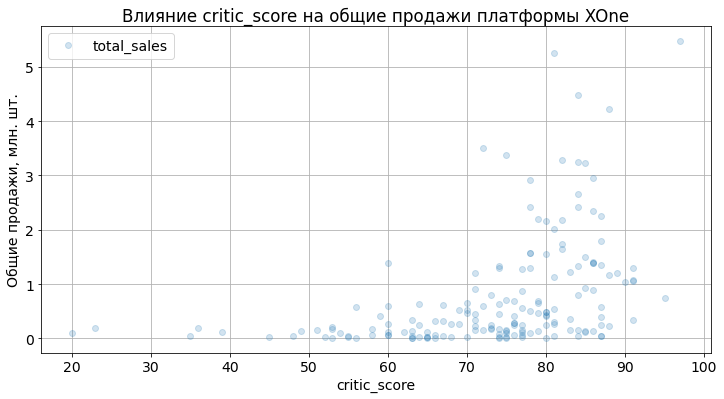

Корреляция Пирсена для платформы PS3


,total_sales,user_score,critic_score
total_sales,1.000000,0.022691,0.333807
user_score,0.022691,1.000000,0.599920
critic_score,0.333807,0.599920,1.000000


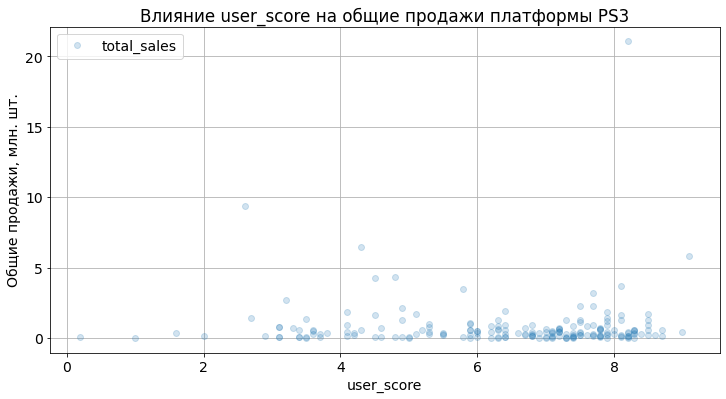

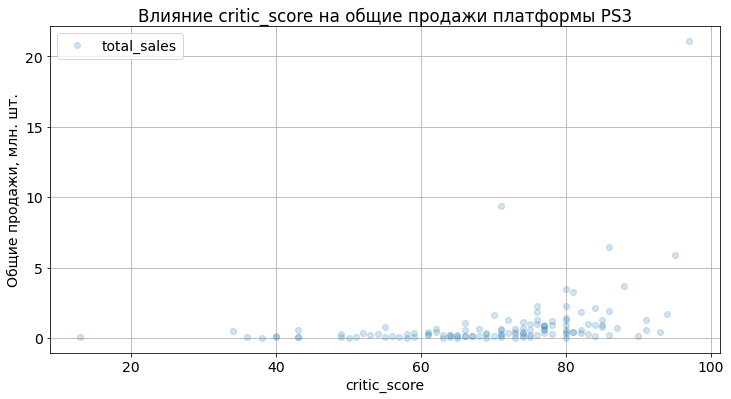

Корреляция Пирсена для платформы 3DS


,total_sales,user_score,critic_score
total_sales,1.000000,0.272990,0.339235
user_score,0.272990,1.000000,0.769536
critic_score,0.339235,0.769536,1.000000


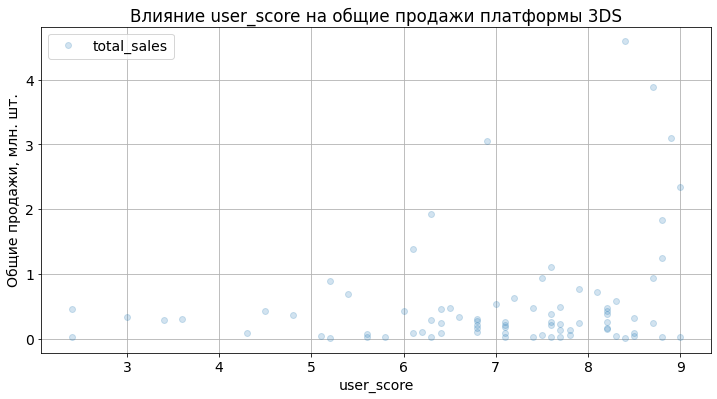

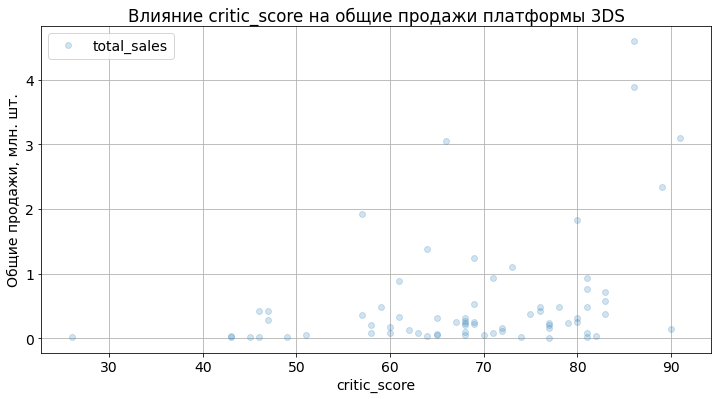

Корреляция Пирсена для платформы X360


,total_sales,user_score,critic_score
total_sales,1.000000,-0.006238,0.350345
user_score,-0.006238,1.000000,0.520946
critic_score,0.350345,0.520946,1.000000


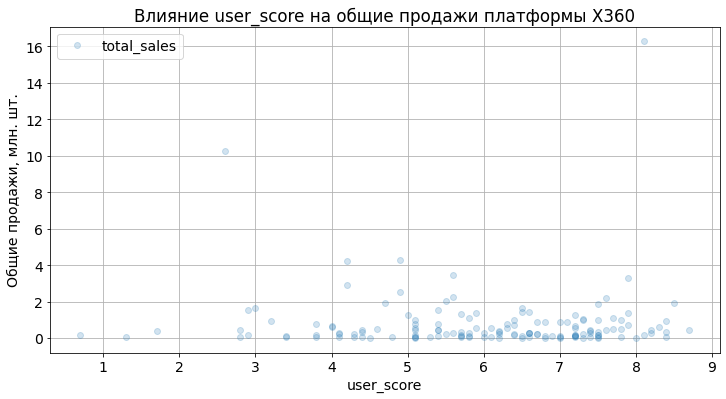

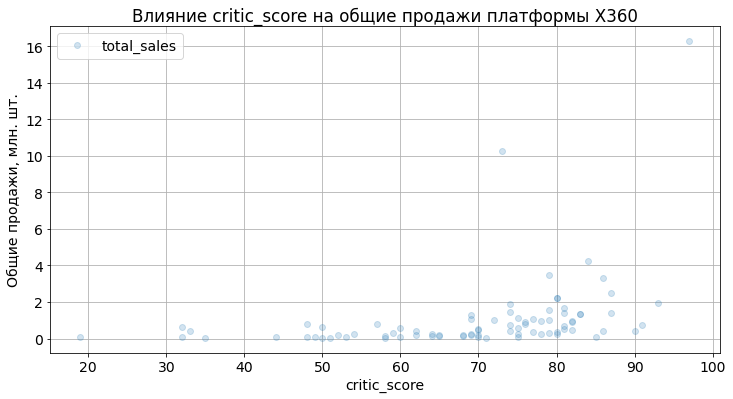

Корреляция Пирсена для платформы PC


,total_sales,user_score,critic_score
total_sales,1.000000,-0.109235,0.194124
user_score,-0.109235,1.000000,0.429562
critic_score,0.194124,0.429562,1.000000


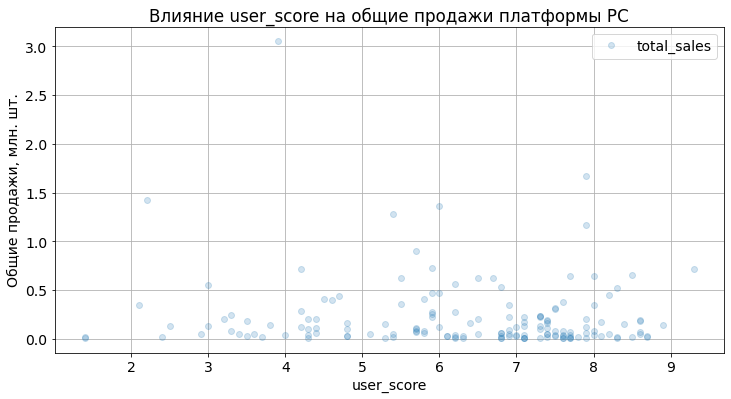

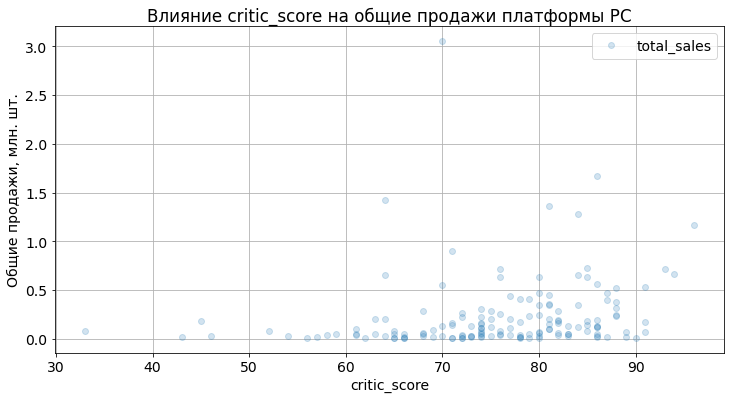

In [ ]:
scores = ('user_score', 'critic_score')
platforms = ('XOne', 'PS3', '3DS', 'X360', 'PC')

for platform in platforms:
    if platform == 'PS4':
        continue
    print(f'Корреляция Пирсена для платформы {platform}')
    display(df[(df['platform']==platform) & (df['user_score']>0) & (df['critic_score']>0)][['total_sales','user_score','critic_score']].corr())
    for score in scores:
        (df[(df['platform']==platform) & (df[score]>0)]
        .plot(x=score, y='total_sales', figsize=(12,6), style='o', alpha=0.2, grid=True, xlabel=score, ylabel='Общие продажи, млн. шт.', title=(f'Влияние {score} на общие продажи платформы {platform}'))
        );
    plt.show()


По следующим пять платформам (по общей доле продаж) ситуация аналогична, корреляция отсутствует/слабая.

### Оценка прибыльности жанров

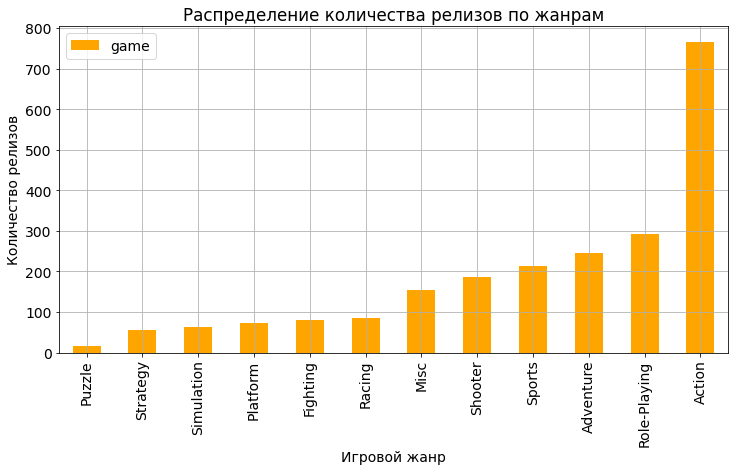

In [ ]:
# Посмотрим на распределение игр по жанрам
(df.pivot_table(index='genre', values='game', aggfunc='count')
.sort_values('game')
.plot(kind='bar', y='game', figsize=(12,6), color='orange', grid=True, xlabel='Игровой жанр', ylabel='Количество релизов', title='Распределение количества релизов по жанрам')
);

По количеству игр с сильным отрывом лидирует жанр `Action`, также в топе `Roleplaying`, `Adventure`, `Sports`, `Shooter`, `Misc`.

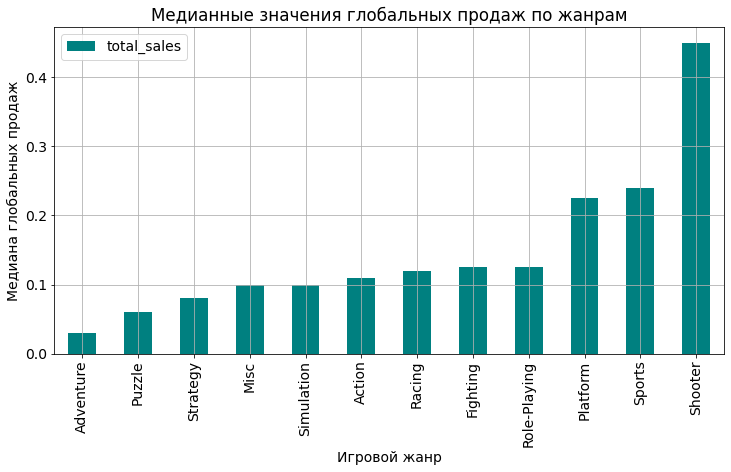

In [ ]:
(df.pivot_table(index='genre', values='total_sales', aggfunc='median')
.sort_values('total_sales')
.plot(kind='bar', y='total_sales', figsize=(12,6), color='teal', grid=True, xlabel='Игровой жанр', ylabel='Медиана глобальных продаж', title='Медианные значения глобальных продаж по жанрам')
);

В медианных значениях продаж картина отличается.  
Лидирует жанр `Shooter`, также выше остальных значений жанры `Sports` и `Platform`.  
Остальные жанры показывают похожие результаты.  
Самые низкие значения у жанров `Strategy`, `Puzzle`, `Adventure`.

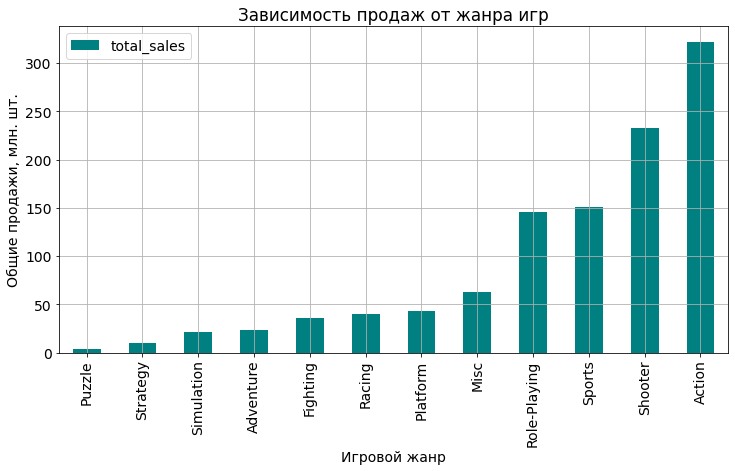

In [ ]:
# Посмотрим на глобальные продажи по жанрам
(df
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values('total_sales')
 .plot(kind='bar', y='total_sales', figsize=(12,6), color='teal', grid=True, xlabel='Игровой жанр', ylabel='Общие продажи, млн. шт.', title='Зависимость продаж от жанра игр')
);

Жанр `Action` обеспечивает лидерство по глобальным продажам за счёт количества релизов.

* Рекомендуется сфокусироваться на жанрах, медианные продажи которых показывают высокий уровень в совокупности с количеством релизов - `Shooter`, `Sports`.  
* В случае возможности исключительно цифровой аттрибуции, не стоит обходить стороной жанр Action.

In [ ]:
df_boxplot = df.pivot_table(index='game', columns='genre', values='total_sales')

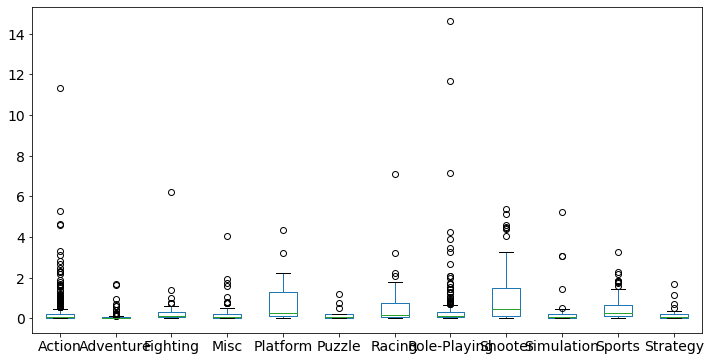

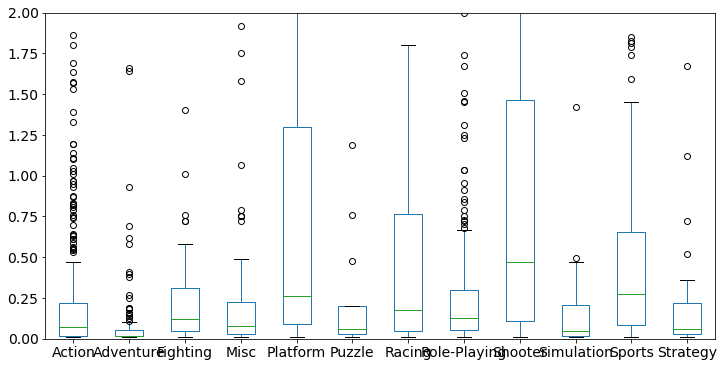

In [ ]:
df_boxplot.plot(kind='box', figsize=(12,6));
df_boxplot.plot(kind='box', ylim=(0, 2), figsize=(12,6));

Диаграммы размаха продаж по жанрам демонтсрируют высокую стабильность жанров `Platform` и `Shooter`.

### Вывод
* Наблюдается снижение уровня продаже после 2009 года;
* Средний срок жизни платформы около 8-ми лет;
* Для дальнейшего анализа актуальным был принят период после 2013-го года включительно;
* Медиана глобальных продаж составляет 0.11 млн. шт., тогда как среднее значение равняется 0.49 млн. шт.
* Приоритетными для фокуса являются современные платформы PS4 и XOne с дополнением в виде PC как "вечной" платформы;
* Корреляция между уровнем продаж и оценками пользователей/критиков ниже средней;
* Рекомендуется сфокусироваться на жанре, медианные продажи которого показывают высокий уровень в совокупности с количеством релизов - `Shooter`;
* В случае возможности исключительно цифровой аттрибуции, не стоит обходить стороной жанр `Action`.

<div class="alert alert-info"> <b>Комментарии студента:</b> Поправил рекомендацию по фокусу на один жанр - Shooter.
</div>

## Потртет пользователя по регионам

### Топ-5 платформ по глобальным продажам в разрезе по регионам

In [ ]:
# Сформируем топ-5 платформ по продажам в разрезе по регионам
# Долю в топе оставляем от общего количества

regions = ('na_sales', 'eu_sales', 'jp_sales')

for region in regions:
    print('Топ-5 платформ по продажам в регионе ' + region[0:2])
    df_top = df.pivot_table(index='platform', values=region, aggfunc='sum')
    df_top['share'] = round((df_top[region] / df_top[region].sum() * 100), 2)
    print(df_top.sort_values(by=region, ascending=False).head(5))
    print('---')

Топ-5 платформ по продажам в регионе na
          na_sales  share
platform                 
PS4         108.74  24.84
XOne         93.12  21.27
X360         81.66  18.66
PS3          63.50  14.51
3DS          38.20   8.73
---
Топ-5 платформ по продажам в регионе eu
          eu_sales  share
platform                 
PS4         141.09  35.97
PS3          67.81  17.29
XOne         51.59  13.15
X360         42.52  10.84
3DS          30.96   7.89
---
Топ-5 платформ по продажам в регионе jp
          jp_sales  share
platform                 
3DS          67.81  48.17
PS3          23.35  16.59
PSV          18.59  13.21
PS4          15.96  11.34
WiiU         10.88   7.73
---


В Северной Америке лидирует PS4 с небольшим отрывом от XOne (46% в сумме), в предыдущих поколения сиутация была обратной.  
В Европе PS4 лидирует с большим отрывом от конкурента текущего поколения (36% против 13%).  
В Японии почти половину рынка занимает 3DS, объясняется это родиной Nintendo (Япония).

### Топ-5 жанров по глобальным продажам в разрезе по регионам

In [ ]:
# Сформируем топ-5 жанров по продажам в разрезе по регионам
# Долю в топе оставляем от общего количества

for region in regions:
    print('Топ-5 жанров по продажам в регионе ' + region[0:2])
    df_top = df.pivot_table(index='genre', values=region, aggfunc='sum')
    df_top['share'] = round((df_top[region] / df_top[region].sum() * 100), 2)
    print(df_top.sort_values(by=region, ascending=False).head(5))
    print('---')

Топ-5 жанров по продажам в регионе na
              na_sales  share
genre                        
Action          126.05  28.80
Shooter         109.74  25.07
Sports           65.27  14.91
Role-Playing     46.40  10.60
Misc             27.49   6.28
---
Топ-5 жанров по продажам в регионе eu
              eu_sales  share
genre                        
Action          118.13  30.12
Shooter          87.86  22.40
Sports           60.52  15.43
Role-Playing     36.97   9.43
Racing           20.19   5.15
---
Топ-5 жанров по продажам в регионе jp
              jp_sales  share
genre                        
Role-Playing     51.04  36.26
Action           40.49  28.76
Misc              9.20   6.54
Fighting          7.65   5.43
Shooter           6.61   4.70
---


Северная Америка и Европа похожи по распределению долей топовых жанров при бОльших абсолютных продажах в Северной Америке.  
Два лидирующих жанра Action и Shooter в сумме занимают 53.9% и 52.5% соответственно.

В Японии лидирует жанр Role-Playing, совместно с Action занимают 55% рынка.  
Жанр Shooter в Японии значительно менее популярен и занимает долю 4.7%.

### Влияние рейтинга ESRB на глобальные продажи в разрезе по регионам

In [ ]:
# Проверим влияние рейтинга ESRB на продажи в каждом регионе

for region in regions:
    print('Продажи в разбивке по рейтингу ESRB в регионе ' + region[0:2])
    df_top = df.pivot_table(index='age_rating', values=region, aggfunc='sum')
    df_top['share'] = round((df_top[region] / df_top[region].sum() * 100), 2)
    print(df_top.sort_values(by=region, ascending=False).head(5))
    print('---')

Продажи в разбивке по рейтингу ESRB в регионе na
            na_sales  share
age_rating                 
M             165.21  37.74
unknown        89.42  20.43
E              79.05  18.06
E10+           54.24  12.39
T              49.79  11.38
---
Продажи в разбивке по рейтингу ESRB в регионе eu
            eu_sales  share
age_rating                 
M             145.32  37.05
E              83.36  21.25
unknown        78.91  20.12
E10+           42.69  10.88
T              41.95  10.70
---
Продажи в разбивке по рейтингу ESRB в регионе jp
            jp_sales  share
age_rating                 
unknown        85.05  60.41
T              20.59  14.63
E              15.14  10.75
M              14.11  10.02
E10+            5.89   4.18
---


Для Северной Америки и Европы лидируют продукты с рейтингом M, следующей определённой категорией является E. В обоих регионах в топ-3 присутствует категория 'unknown', определение которой по существующим категориям может влиять на интерпритацию результата.

Для Японии же первой строчкой оказались продукты без категории ESRB. Вероятно это происходит по причине того, что в стране, выпускающей продукты имеется своя собственная система рейтинга, рейтинг ESRB не был присвоен.

### Вывод
**Платформы**  
В Северной Америке лидирует PS4 с небольшим отрывом от XOne (46% в сумме), в предыдущих поколения сиутация была обратной.
В Европе PS4 лидирует с большим отрывом от конкурента текущего поколения (36% против 13%).
В Японии почти половину рынка занимает 3DS, объясняется это родиной Nintendo (Япония).

**Жанры**  
Северная Америка и Европа похожи по распределению долей топовых жанров при бОльших абсолютных продажах в Северной Америке.  
Два лидирующих жанра Action и Shooter в сумме занимают 53.9% и 52.5% соответственно.

В Японии лидирует жанр Role-Playing, совместно с Action занимают 55% рынка.  
Жанр Shooter в Японии значительно менее популярен и занимает долю 4.7%.

**ERSB**  
Для Северной Америки и Европы лидируют продукты с рейтингом M, следующей определённой категорией является E. В обоих регионах в топ-3 присутствует категория 'unknown', определение которой по существующим категориям может влиять на интерпритацию результата.

Для Японии же первой строчкой оказались продукты без категории ESRB. Вероятно это происходит по причине того, что в стране, выпускающей продукты? имеется своя собственная система рейтинга => рейтинг ESRB не был присвоен.

## Проверка гипотез

Нам необходимо проверить две гипотезы о равенстве:
* Средних пользовательских рейтингов платформ `XBox One` и `PC`
* Средних пользовательских рейтингов жанров `Action` и `Sports`

Значение aplha примем за 0.05. Так как нам требуется сравнить средние значения двух выборок из генеральных совокупностей, будем использовать метод ttest_ind.  
Нулевые гипотезы формируются из условия, что ничего необычного не происходит, то есть средние равны.

In [ ]:
# Отфильтруем данные для построения распределения рейтингов по первой гипотезе
df_first_hyp = df[(df['user_score']>0) & ((df['platform'] == 'XOne') | (df['platform'] == 'PC'))][['user_score', 'platform']]

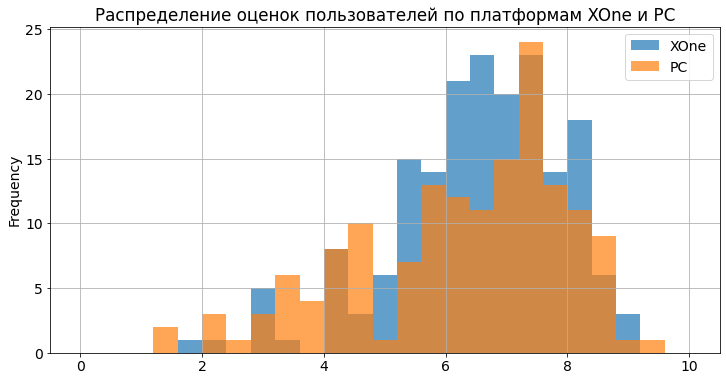

In [ ]:
# Построим диаграмму распределения пользовательских рейтингов платформ XOne и PC
ax = df_first_hyp.query('platform=="XOne"').plot(
    kind='hist',
    figsize=(12,6),
    y='user_score',
    range=(0, 10),
    bins=25,
    linewidth=2,
    alpha=0.7,
    label='XOne',
    xlabel='Пользовательский рейтинг',
    ylabel='Частота',
    title='Распределение оценок пользователей по платформам XOne и PC'
)
df_first_hyp.query('platform=="PC"').plot(
    kind='hist',
    y='user_score',
    range=(0, 10),
    bins=25,
    linewidth=2,
    alpha=0.7,
    label='PC',
    ax=ax,
    grid=True,
    legend=True,
);

In [ ]:
# Отфильтруем данные для построения распределения рейтингов по второй гипотезе
df_second_hyp = df[(df['user_score']>0) & ((df['genre'] == 'Action') | (df['genre'] == 'Sports'))][['user_score', 'genre']]

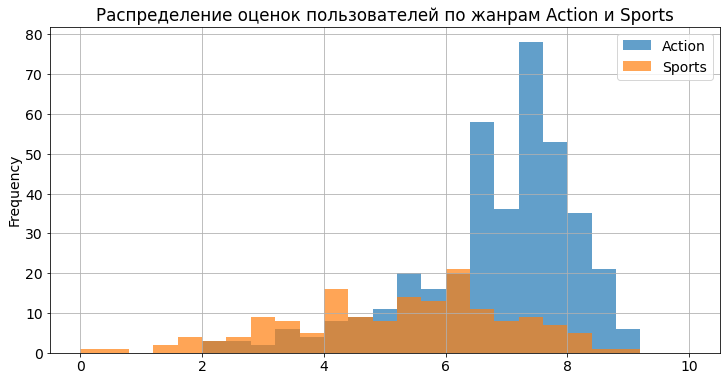

In [ ]:
# Построим диаграмму распределения пользовательских рейтингов платформ XOne и PC
ax = df_second_hyp.query('genre=="Action"').plot(
    kind='hist',
    figsize=(12,6),
    y='user_score',
    range=(0, 10),
    bins=25,
    linewidth=2,
    alpha=0.7,
    label='Action',
    xlabel='Пользовательский рейтинг',
    ylabel='Частота',
    title='Распределение оценок пользователей по жанрам Action и Sports'
)
df_second_hyp.query('genre=="Sports"').plot(
    kind='hist',
    y='user_score',
    range=(0, 10),
    bins=25,
    linewidth=2,
    alpha=0.7,
    label='Sports',
    ax=ax,
    grid=True,
    legend=True,
);

* Генеральные совокупности не зависят друг от друга
* Выборочные средние нормально распределены  
Мы будем формулировать гипотезы о равенстве средних двух генеральных совокупностей и использовать двухсторонний t-тест.

### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформируем нулевую и обратную гипотезы о равенстве средних пользовательских рейтингов платформ `Xbox One` и `PC`:
```
H_0:Средние пользовательские рейтинги (user_score) платформы Xbox One = средним пользовательским рейтингам платформы PC.  
H_a:Средние пользовательские рейтинги (user_score) платформы Xbox One ≠ средним пользовательским рейтингам платформы PC.
alpha = 0.05
```

In [ ]:
from scipy import stats as st

In [ ]:
results = st.ttest_ind(df[(df['platform'] == 'XOne') & (df['user_score']>0)]['user_score'], df[(df['platform'] == 'PC') & (df['user_score']>0)]['user_score'], equal_var=False)

alpha = .05

print(results.pvalue)
if results.pvalue < alpha:
    print(f'Отвергаем нулевую гипотезу на уровне значимости {alpha*100}%')
else:
    print(f'Не получилось отвергнуть нулевую гипотезу на уровне значимости {alpha*100}%')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу на уровне значимости 5.0%


Значение pvalue превышает пороговое значение alpha, не удаётся отвергнуть нулевую гипотезу.  
Иными словами средние пользовательские рейтинги платформ `Xbox One` и `PC` **равны**.

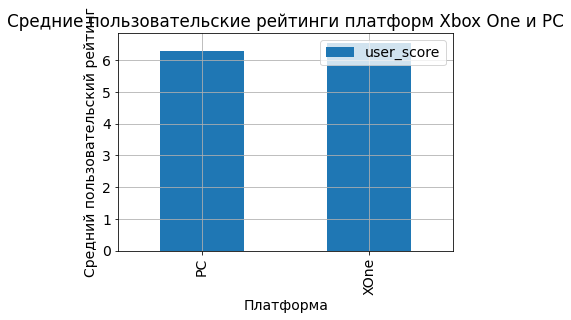

In [ ]:
# Сформируем график среднего значения пользовательских рейтингов платформ Xbox One и PC
(df[(df['user_score']>0) & ((df['platform'] == 'XOne') | (df['platform'] == 'PC'))]
.pivot_table(index='platform', values='user_score', aggfunc='mean')
.plot.bar(xlabel='Платформа', ylabel='Средний пользовательский рейтинг', title='Средние пользовательские рейтинги платформ Xbox One и PC', grid=True)
);

### Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Сформируем нулевую и обратную гипотезы о равенстве средних пользовательских рейтингов жанров `Action` и `Sports`:
```
H_0: Средние пользовательские рейтинги (user_score) жанра Action = средним пользовательским рейтингам жанра Sports.
H_a: Средние пользовательские рейтинги (user_score) жанра Action ≠ средним пользовательским рейтингам жанра Sports.
alpha = 0.05


In [ ]:
results = st.ttest_ind(df[(df['genre'] == 'Action') & (df['user_score']>0)]['user_score'], df[(df['genre'] == 'Sports') & (df['user_score']>0)]['user_score'], equal_var=False)

alpha = .05

print(results.pvalue)
if results.pvalue < alpha:
    print(f'Отвергаем нулевую гипотезу на уровне значимости {alpha*100}%')
else:
    print(f'Не получилось отвергнуть нулевую гипотезу на уровне значимости {alpha*100}%')

1.4460039700704315e-20
Отвергаем нулевую гипотезу на уровне значимости 5.0%


Вероятность случайного получения подобного результата меньше установленного значения aplha, есть основания отвергнуть нулевую гипотезу.  
Иными словами средние пользовательские рейтинги жанров `Action` и `Sports` **разные**.

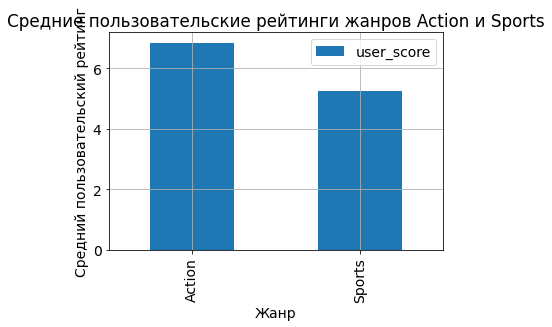

In [ ]:
# Сформируем график среднего значения пользовательских рейтингов жанров Action и Sports
(df[(df['user_score']>0) & ((df['genre'] == 'Action') | (df['genre'] == 'Sports'))]
.pivot_table(index='genre', values='user_score', aggfunc='mean')
.plot.bar(xlabel='Жанр', ylabel='Средний пользовательский рейтинг', title='Средние пользовательские рейтинги жанров Action и Sports', grid=True)
);

## Общий вывод

**Подготовка данных**  
Были скорректированы названия столбцов, изменён тип данных в нескольких столбцах и поставлены заглушки на пропущенные значения столбцов рейтингов, удалены порядка 1.6% данных, имеющих пропуски в столбцах 'name' и 'genre'.
Возможные причины возникновения пропусков:
* технический аспект при сохранении/передаче/извлечении данных;
* малое количестве оценок для конкретных игр, что влечёт за собой отсутствие калькуляции;
* давний релиз игры, когда централизованная система оценок отсутствовала;
* пропуски в возрастных рейтингах вероятно имеют взаимосвязь с географией издателей.

**Исследовательский анализ данных**
* Наблюдается снижение уровня продаже после 2009 года;
* Средний срок жизни платформы около 8-ми лет;
* Для дальнейшего анализа актуальным был принят период после 2013-го года включительно;
* Медиана глобальных продаж составляет 0.11 млн. шт., тогда как среднее значение равняется 0.49 млн. шт.
* Приоритетными для фокуса являются современные платформы PS4 и XOne с дополнением в виде PC как "вечной" платформы;
* Корреляция между уровнем продаж и оценками пользователей/критиков ниже средней;
* Рекомендуется сфокусироваться на жанре, медианные продажи которого показывают высокий уровень в совокупности с количеством релизов - `Shooter`;

**Портрет пользователя по регионам**  
**Платформы**  
В Северной Америке лидирует PS4 с небольшим отрывом от XOne (46% в сумме), в предыдущих поколения сиутация была обратной. В Европе PS4 лидирует с большим отрывом от конкурента текущего поколения (36% против 13%). В Японии почти половину рынка занимает 3DS, объясняется это родиной Nintendo (Япония).  
**Жанры**  
Северная Америка и Европа похожи по распределению долей топовых жанров при бОльших абсолютных продажах в Северной Америке.
Два лидирующих жанра Action и Shooter в сумме занимают 53.9% и 52.5% соответственно.  
В Японии лидирует жанр Role-Playing, совместно с Action занимают 55% рынка.
Жанр Shooter в Японии значительно менее популярен и занимает долю 4.7%.  
**ERSB**  
Для Северной Америки и Европы лидируют продукты с рейтингом M, следующей определённой категорией является E.
Для Японии же первой строчкой оказались продукты без категории ESRB. Вероятно это происходит по причине того, что в стране, выпускающей продукты, имеется своя собственная система рейтинга => рейтинг ESRB не был присвоен.

**Проверка гипотез**  
Можно утверждать, что пользовательские рейтинги платформ `XBox One` и `PC` одинаковые.
Гипотеза о равенстве пользовательских рейтингов жанров `Action` и `Sports`была отвергнута.


Для **планирования рекламных кампаний** на следующий год рекомендуется сконцентрироваться на:

* современных платформах `PS4` и `Xbox One` на рынках Северной Америки и Европы
* жанре `Shooter`, демонстрирующем максимальные медианные продажи в совокупности с высоким уровнем релизов;
* приоритетный рейтинг ESRB - `M`.